Stock: NVDA
- Basic information
- Historical data for the last 5 years with a precision of 1 day
- Annual and quarterly detailed financial reports for the last 5 years
- Balance sheets for the last 5 years
- Annual and quarterly cash flows for the last 5 years

In [21]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd
import matplotlib.pyplot as plt
import os

Basic test from [alpha_vantage github homepage](https://github.com/RomelTorres/alpha_vantage?tab=readme-ov-file) 

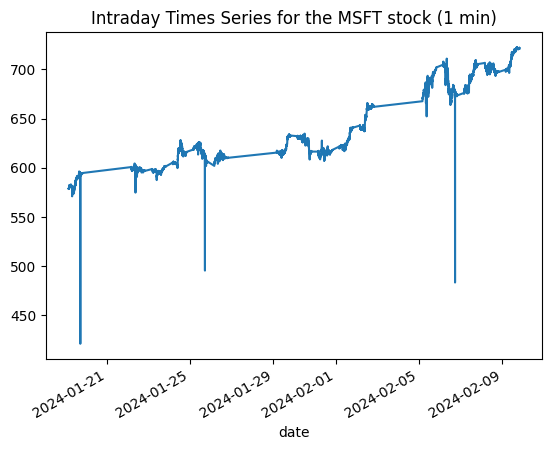

In [6]:
ts = TimeSeries(key='QZLC05N9YQGC4YYD', output_format='pandas')
daily_adjusted_data, meta_data = ts.get_intraday(
    symbol='NVDA', interval='1min', outputsize='full')
daily_adjusted_data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

Setup for APIs and other settings.

In [47]:
# API Keys
free_api_key = "QZLC05N9YQGC4YYD"
premium_api_key = "E8YTXNGHL6A0A5L9"

symbol = 'NVDA'
fd = FundamentalData(premium_api_key)
ts = TimeSeries(key=premium_api_key, output_format='pandas')

row_data_path = '../../data/row/'

## Basic Information

In [18]:
# Fetch company overview data
overview_data, _ = fd.get_company_overview(symbol)
overview_df = pd.DataFrame.from_dict(overview_data, orient='index')

In [24]:
# Save selected data to CSV
overview_data_path = os.path.join(
    row_data_path, f'{symbol}_financial_overview.csv')
overview_df.to_csv(overview_data_path, header=False)

## Historical data for the last 5 years with a precision of 1 day

In [43]:
# Get historical stock data for NVDA
daily_adjusted_data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')

# Filter the last 5 years
# data_last_5_years = data.last('5Y')

# Plot the closing price
# data_last_5_years['5. adjusted close'].plot(
#     title='NVDA Adjusted Close Price Over the Last 5 Years')
# plt.show()

# Filter the data for the last 5 years
now = pd.Timestamp.now()
start_date = now - pd.DateOffset(years=5)
data_filtered = daily_adjusted_data[start_date.strftime('%Y-%m-%d'):]

In [ ]:
# Ensure the row_data_path directory exists
os.makedirs(row_data_path, exist_ok=True)

# Save the filtered data to a CSV file
csv_file_path = os.path.join(row_data_path, f'{symbol}_5_years_daily_data.csv')
data_filtered.to_csv(csv_file_path)

print(f"Data saved to {csv_file_path}")

## Annual and quarterly detailed financial reports for the last 5 years

In [49]:
def fetch_and_save_financial_reports(report_type, time_period):
    """
    Fetch and save financial reports to CSV.
    
    :param report_type: Type of financial report ('income_statement', 'balance_sheet', 'cash_flow')
    :param time_period: 'annual' or 'quarterly'
    """
    # Fetch the data
    if report_type == 'income_statement':
        if time_period == 'annual':
            data, _ = fd.get_income_statement_annual(symbol)
        else:
            data, _ = fd.get_income_statement_quarterly(symbol)
    elif report_type == 'balance_sheet':
        if time_period == 'annual':
            data, _ = fd.get_balance_sheet_annual(symbol)
        else:
            data, _ = fd.get_balance_sheet_quarterly(symbol)
    elif report_type == 'cash_flow':
        if time_period == 'annual':
            data, _ = fd.get_cash_flow_annual(symbol)
        else:
            data, _ = fd.get_cash_flow_quarterly(symbol)

    # Add more conditions if fetching balance sheets or cash flow statements

    # Convert data to DataFrame
    df = pd.DataFrame(data.iloc[:5])

    # Ensure the row_data_path directory exists
    os.makedirs(row_data_path, exist_ok=True)

    # Save the DataFrame to a CSV file
    csv_file_path = os.path.join(
        row_data_path, f'{symbol}_{report_type}_{time_period}_5_years.csv')
    df.to_csv(csv_file_path, index=False)
    print(f"Saved {report_type} {time_period} reports to {csv_file_path}")


In [ ]:
financial_reports = ['income_statement', 'balance_sheet', 'cash_flow']

# for report in financial_reports:
#     fetch_and_save_financial_reports(report, 'annual')

#     fetch_and_save_financial_reports(report, 'quarterly')

In [45]:
fetch_and_save_financial_reports('income_statement', 'annual')

fetch_and_save_financial_reports('income_statement', 'quarterly')

Saved income_statement annual reports to ../../data/row/NVDA_income_statement_annual_5_years.csv
Saved income_statement quarterly reports to ../../data/row/NVDA_income_statement_quarterly_5_years.csv


## Balance sheets for the last 5 years

In [48]:
 fetch_and_save_financial_reports('balance_sheet', 'annual')

Saved balance_sheet annual reports to ../../data/row/NVDA_balance_sheet_annual_5_years.csv
Saved balance_sheet quarterly reports to ../../data/row/NVDA_balance_sheet_quarterly_5_years.csv


## Annual and quarterly cash flows for the last 5 years

In [50]:
fetch_and_save_financial_reports('cash_flow', 'annual')

fetch_and_save_financial_reports('cash_flow', 'quarterly')

Saved cash_flow annual reports to ../../data/row/NVDA_cash_flow_annual_5_years.csv
Saved cash_flow quarterly reports to ../../data/row/NVDA_cash_flow_quarterly_5_years.csv
